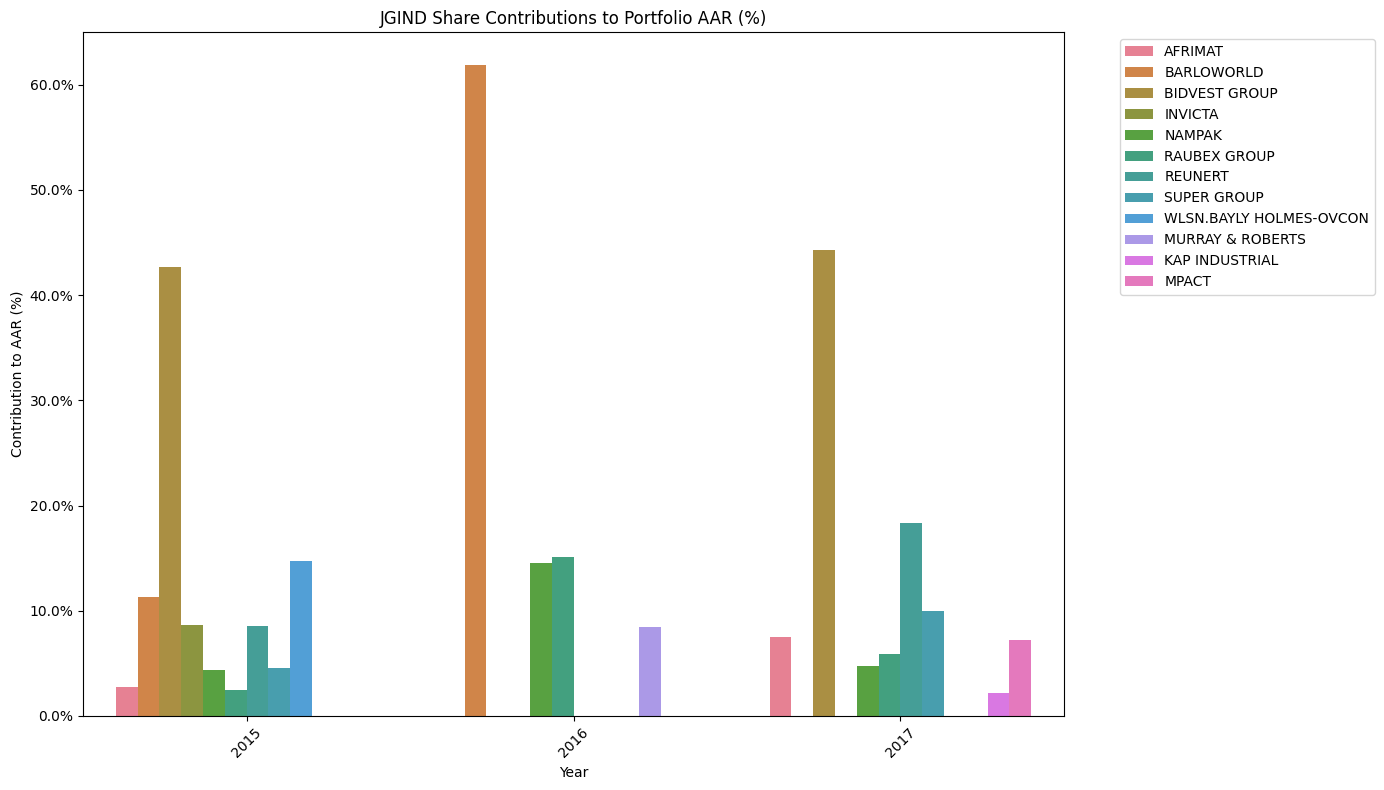

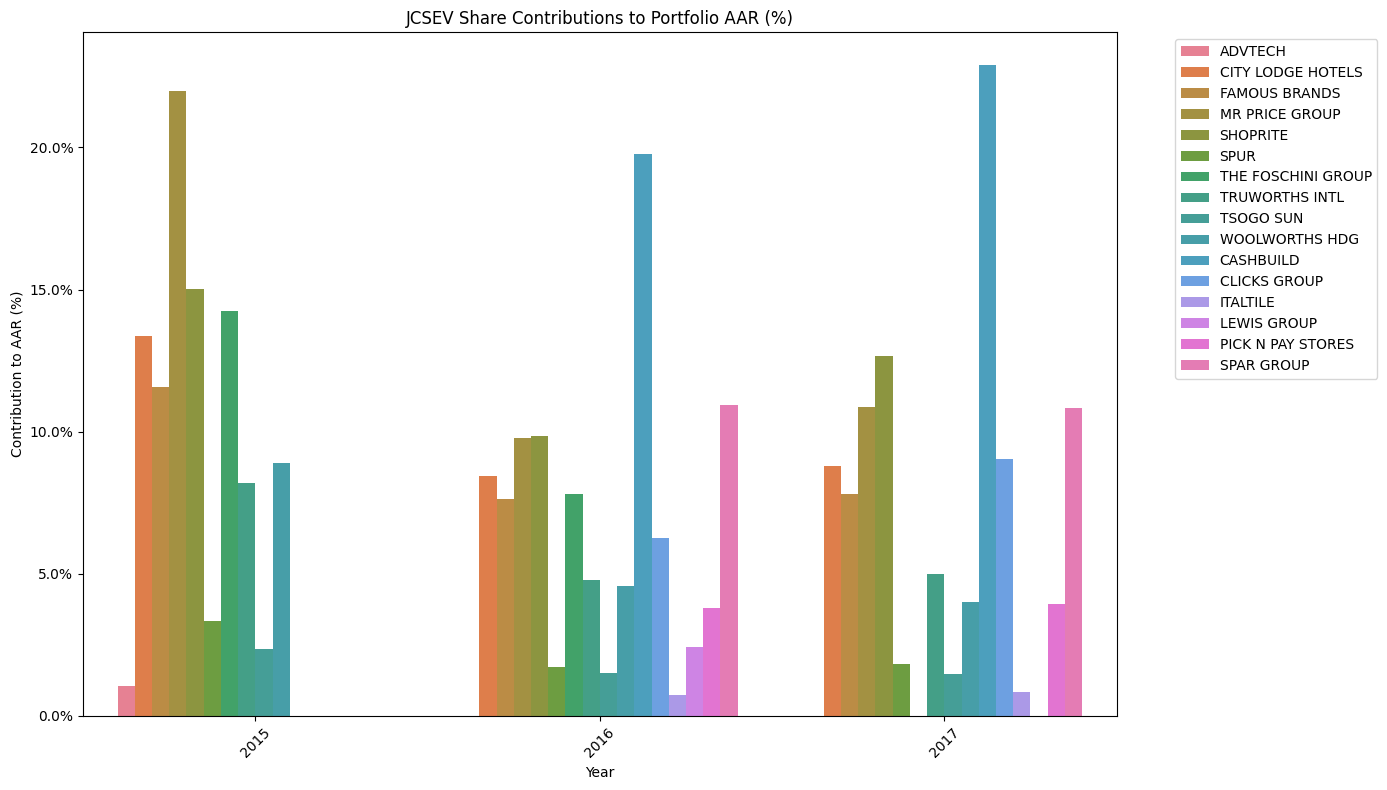

ModuleNotFoundError: No module named 'ace_tools'

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

with open('experiment_results/task_1/invest_recommendation_beta_1.0.json', 'r') as json_file:
    portfolio_data = json.load(json_file)

invest_clean_df = pd.read_csv('data/INVEST_clean.csv')

jgind_shares = portfolio_data['JGIND']['investableShares']
jcsev_shares = portfolio_data['JCSEV']['investableShares']
jgind_aar = portfolio_data['JGIND']['performanceMetrics']['IP.JGIND']['AAR']
jcsev_aar = portfolio_data['JCSEV']['performanceMetrics']['IP.JCSEV']['AAR']

# Filter the CSV data for relevant shares and years
invest_clean_df['Year'] = pd.to_datetime(invest_clean_df['Date']).dt.year
filtered_df = invest_clean_df[invest_clean_df['Year'].isin([2015, 2016, 2017, 2018])]

if 'Name' not in filtered_df.columns:
    raise KeyError("The 'Name' column is missing from the dataset. Please ensure the CSV file contains a 'Name' column.")

def calculate_share_contribution(portfolio_shares, portfolio_aar, portfolio_name):
    contributions = []
    for year, shares in portfolio_shares.items():
        yearly_df = filtered_df[(filtered_df['Year'] == int(year)) & (filtered_df['Name'].isin(shares))]
        yearly_returns = yearly_df.groupby('Name')['Price'].mean()
        total_return = yearly_returns.sum()
        for share, share_return in yearly_returns.items():
            contribution_percentage = (share_return / total_return) * 100
            contributions.append({'Year': year, 'Share': share, 'Contribution (%)': contribution_percentage, 'Portfolio': portfolio_name})
    return pd.DataFrame(contributions)

# Calculate contributions for JGIND and JCSEV
jgind_contributions_df = calculate_share_contribution(jgind_shares, jgind_aar, 'JGIND')
jcsev_contributions_df = calculate_share_contribution(jcsev_shares, jcsev_aar, 'JCSEV')

# Plot the share contributions for JGIND
plt.figure(figsize=(14, 8))
sns.barplot(data=jgind_contributions_df, x='Year', y='Contribution (%)', hue='Share')
plt.title('JGIND Share Contributions to Portfolio AAR (%)')
plt.ylabel('Contribution to AAR (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the share contributions for JCSEV
plt.figure(figsize=(14, 8))
sns.barplot(data=jcsev_contributions_df, x='Year', y='Contribution (%)', hue='Share')
plt.title('JCSEV Share Contributions to Portfolio AAR (%)')
plt.ylabel('Contribution to AAR (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

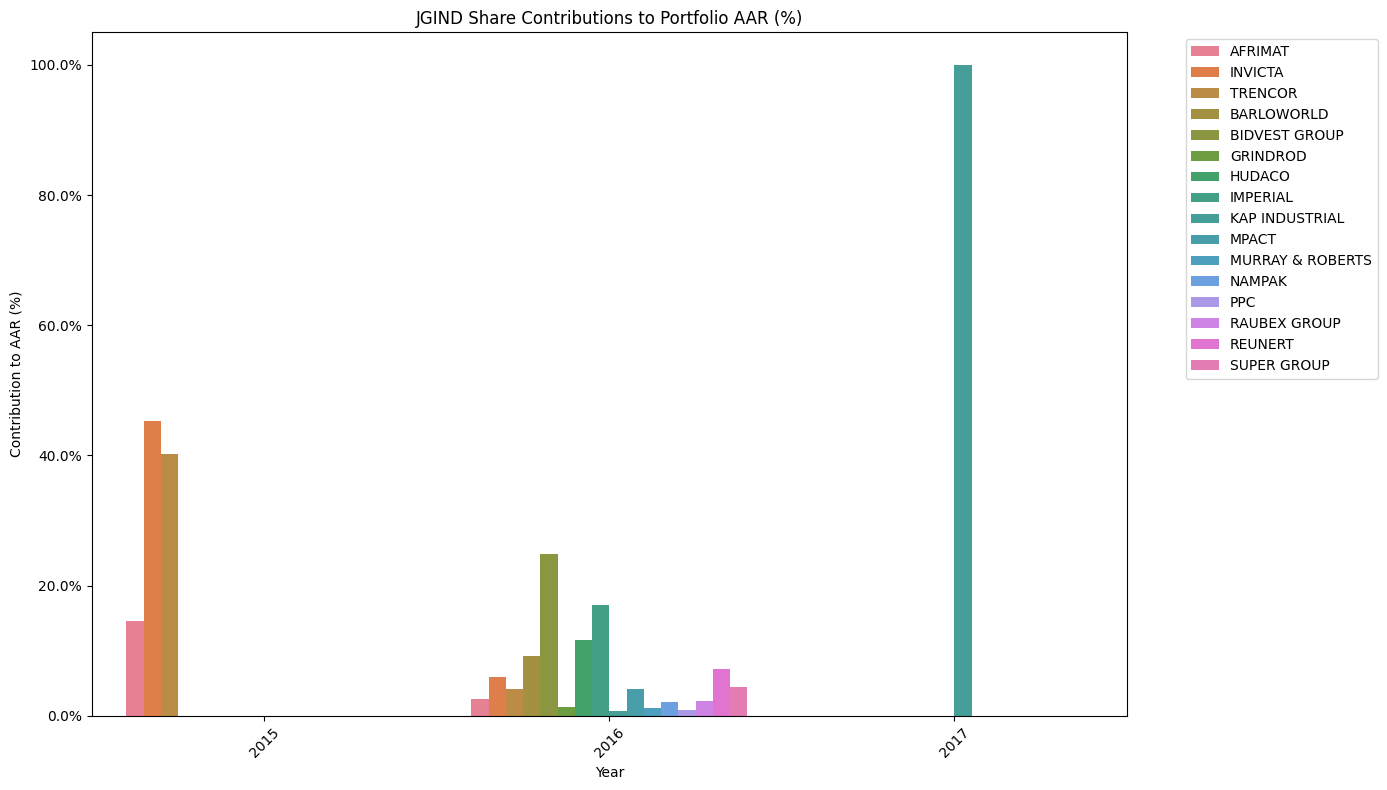

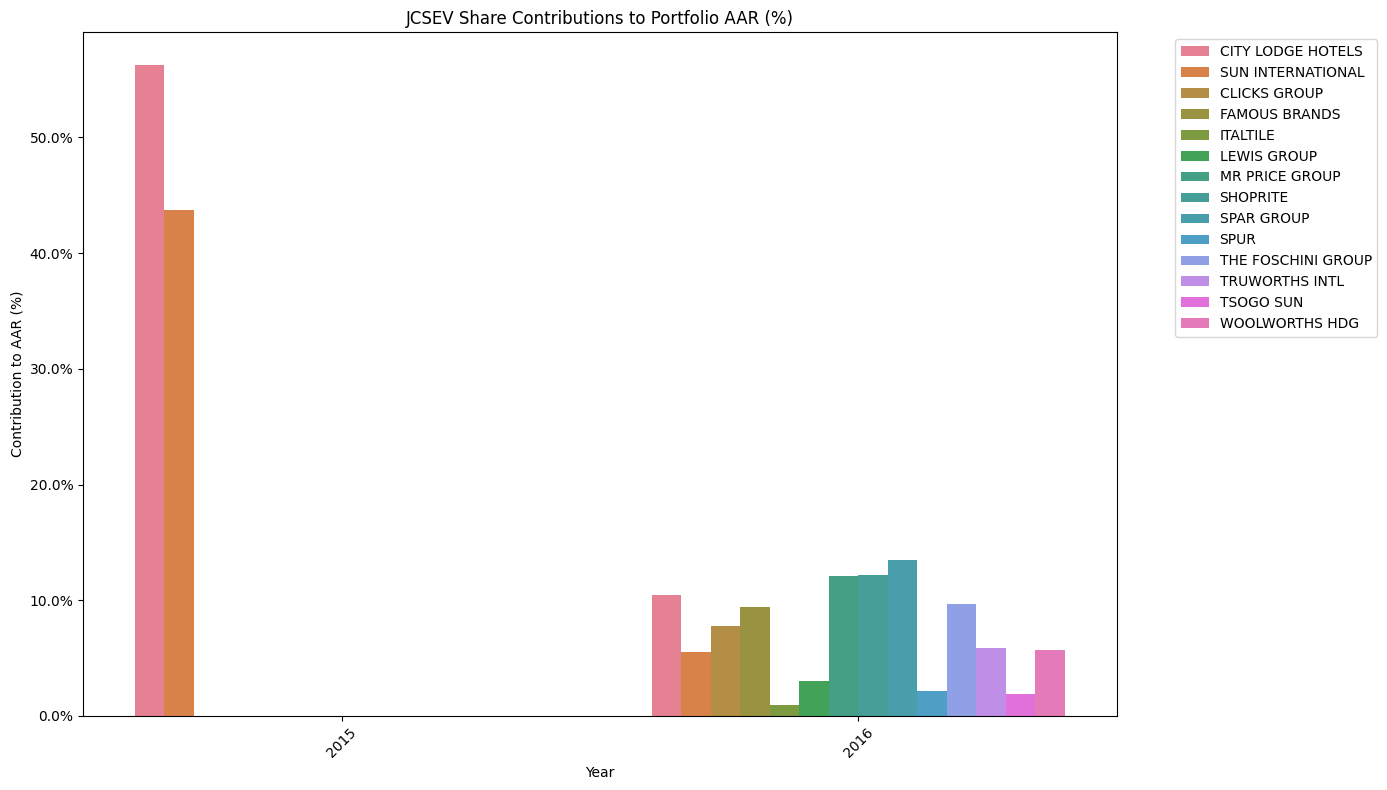

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

beta_value = 0.2
with open(f'experiment_results/task_3/short_term_investment_beta_{beta_value}.json', 'r') as json_file:
    portfolio_data = json.load(json_file)

invest_clean_df = pd.read_csv('data/INVEST_clean.csv')

jgind_shares = portfolio_data['JGIND']['investableShares']
jcsev_shares = portfolio_data['JCSEV']['investableShares']
jgind_aar = portfolio_data['JGIND']['performanceMetrics']['IP.JGIND']['AAR']
jcsev_aar = portfolio_data['JCSEV']['performanceMetrics']['IP.JCSEV']['AAR']

invest_clean_df['Year'] = pd.to_datetime(invest_clean_df['Date']).dt.year
filtered_df = invest_clean_df[invest_clean_df['Year'].isin([2015, 2016, 2017, 2018])]

if 'Name' not in filtered_df.columns:
    raise KeyError("The 'Name' column is missing from the dataset. Please ensure the CSV file contains a 'Name' column.")

def calculate_share_contribution(portfolio_shares, portfolio_aar, portfolio_name):
    contributions = []
    for year, shares in portfolio_shares.items():
        yearly_df = filtered_df[(filtered_df['Year'] == int(year)) & (filtered_df['Name'].isin(shares))]
        yearly_returns = yearly_df.groupby('Name')['Price'].mean()
        total_return = yearly_returns.sum()
        for share, share_return in yearly_returns.items():
            contribution_percentage = (share_return / total_return) * 100
            contributions.append({'Year': year, 'Share': share, 'Contribution (%)': contribution_percentage, 'Portfolio': portfolio_name})
    return pd.DataFrame(contributions)

# Calculate contributions for JGIND and JCSEV
jgind_contributions_df = calculate_share_contribution(jgind_shares, jgind_aar, 'JGIND')
jcsev_contributions_df = calculate_share_contribution(jcsev_shares, jcsev_aar, 'JCSEV')

# Plot the share contributions for JGIND
plt.figure(figsize=(14, 8))
sns.barplot(data=jgind_contributions_df, x='Year', y='Contribution (%)', hue='Share')
plt.title('JGIND Share Contributions to Portfolio AAR (%)')
plt.ylabel('Contribution to AAR (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the share contributions for JCSEV
plt.figure(figsize=(14, 8))
sns.barplot(data=jcsev_contributions_df, x='Year', y='Contribution (%)', hue='Share')
plt.title('JCSEV Share Contributions to Portfolio AAR (%)')
plt.ylabel('Contribution to AAR (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()